# Exploratory analysis

Kaggle competition https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting

In [1]:
import pylab as py
import pandas as pandas
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [2]:
### Load data
data_air_reserve = pandas.read_csv('Data/air_reserve.csv')
data_air_store_info = pandas.read_csv('Data/air_store_info.csv')
data_air_visit_data = pandas.read_csv('Data/air_visit_data.csv')
data_date_info = pandas.read_csv('Data/date_info.csv')
data_hpg_reserve = pandas.read_csv('Data/hpg_reserve.csv')
data_hpg_store_info = pandas.read_csv('Data/hpg_store_info.csv')
data_store_id_relation = pandas.read_csv('Data/store_id_relation.csv')

## Reservation data

Since we are tring to predict reservation data, let's look at these files first.

In [3]:
data_air_reserve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
air_store_id        92378 non-null object
visit_datetime      92378 non-null object
reserve_datetime    92378 non-null object
reserve_visitors    92378 non-null int64
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [4]:
data_hpg_reserve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000320 entries, 0 to 2000319
Data columns (total 4 columns):
hpg_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors    int64
dtypes: int64(1), object(3)
memory usage: 61.0+ MB


Each reservation contains information about 
* Time when the reservation was requested.
* Time for the restaurant visit.
* Number of people to visit.
* Restaurant.

There are two reservation services, AIR and HPG. The most popular is HPG, by far, with 2 million reservations compared to 90k reservations by AIR.

## Store information



In [149]:
data_air_store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
air_store_id      829 non-null object
air_genre_name    829 non-null object
air_area_name     829 non-null object
latitude          829 non-null float64
longitude         829 non-null float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB


In [150]:
data_hpg_store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 5 columns):
hpg_store_id      4690 non-null object
hpg_genre_name    4690 non-null object
hpg_area_name     4690 non-null object
latitude          4690 non-null float64
longitude         4690 non-null float64
dtypes: float64(2), object(3)
memory usage: 183.3+ KB


In [151]:
data_store_id_relation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
air_store_id    150 non-null object
hpg_store_id    150 non-null object
dtypes: object(2)
memory usage: 2.4+ KB


The exact location of each restaurant is informed. Let's take a look at the distribution, using Tokyo (Imperial Palace) as the reference.

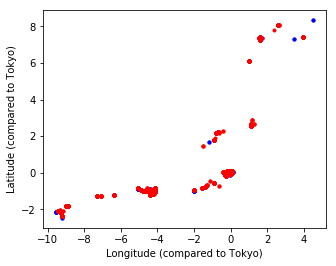

In [152]:
fig = py.figure()
reference = [35.685360, 139.753372]
ax = fig.add_subplot(111,aspect='equal')
lat = data_air_store_info['latitude'] - reference[0]
lon = data_air_store_info['longitude'] - reference[1]
ax.plot(lon, lat, 'b.')
lat = data_hpg_store_info['latitude'] - reference[0]
lon = data_hpg_store_info['longitude'] - reference[1]
ax.plot(lon, lat, 'r.')

ax.set_xlabel('Longitude (compared to Tokyo)');
ax.set_ylabel('Latitude (compared to Tokyo)');

These restaurants are distributed to many cities, not just Tokyo.

We can also see how restaurants are distributed by genres.

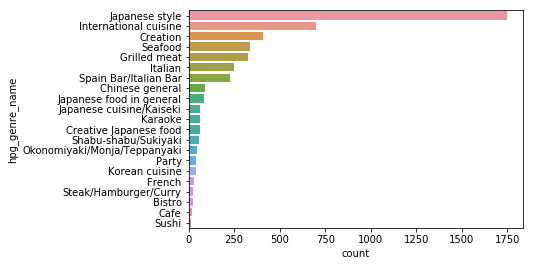

In [153]:
values = data_hpg_store_info['hpg_genre_name'].value_counts()
values = values[values>10]
sns.countplot(y='hpg_genre_name', data=data_hpg_store_info, order=values.index)

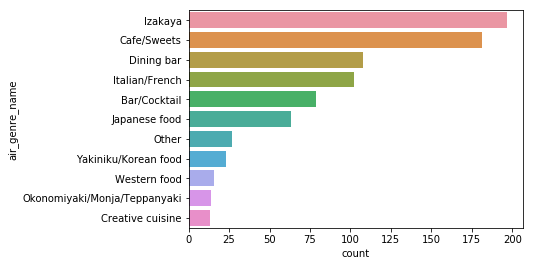

In [154]:
values = data_air_store_info['air_genre_name'].value_counts()
values = values[values>10]
sns.countplot(y='air_genre_name', data=data_air_store_info, order=values.index)

Apparently, there is a difference in focus between the two services. HPG focuses on restaurants and most of its stores are of 'Japanese style' food. AIR focuses more on pubs ('Izakaya') and cafes. 

## Repeated stores

There are some stores available from both AIR and HPG.

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0
5,2016-01-06,Wednesday,0
6,2016-01-07,Thursday,0
7,2016-01-08,Friday,0
8,2016-01-09,Saturday,0
9,2016-01-10,Sunday,0


In [170]:
air_stores_rev = data_air_reserve['air_store_id'].unique()
air_stores_info = data_air_store_info['air_store_id'].unique()
print(len(air_stores_rev))
print(len(air_stores_info))
print(len([x for x in air_stores_rev if x not in air_stores_info]))
hpg_stores_rev = data_hpg_reserve['hpg_store_id'].unique()
hpg_stores_info = data_hpg_store_info['hpg_store_id'].unique()
print(len(hpg_stores_rev))
print(len(hpg_stores_info))
print(len([x for x in hpg_stores_rev if x not in hpg_stores_info]))
print(len([x for x in hpg_stores_rev if x in hpg_stores_info]))

314
829
0
13325
4690
8635
4690


In [173]:
air_stores_rev = data_air_reserve['air_store_id'].unique()
air_stores_info = data_air_store_info['air_store_id'].unique()
air_ids = set(list(air_stores_rev) + list(air_stores_info))
belong00 = [x for x in air_ids if x not in air_stores_rev and x not in air_stores_info]
belong01 = [x for x in air_ids if x not in air_stores_rev and x in air_stores_info]
belong10 = [x for x in air_ids if x in air_stores_rev and x not in air_stores_info]
belong11 = [x for x in air_ids if x in air_stores_rev and x in air_stores_info]
print(len(belong00))
print(len(belong01))
print(len(belong10))
print(len(belong11))

0
515
0
314


In [174]:
hpg_stores_rev = data_hpg_reserve['hpg_store_id'].unique()
hpg_stores_info = data_hpg_store_info['hpg_store_id'].unique()
hpg_ids = set(list(hpg_stores_rev) + list(hpg_stores_info))
belong00 = [x for x in hpg_ids if x not in hpg_stores_rev and x not in hpg_stores_info]
belong01 = [x for x in hpg_ids if x not in hpg_stores_rev and x in hpg_stores_info]
belong10 = [x for x in hpg_ids if x in hpg_stores_rev and x not in hpg_stores_info]
belong11 = [x for x in hpg_ids if x in hpg_stores_rev and x in hpg_stores_info]
print(len(belong00))
print(len(belong01))
print(len(belong10))
print(len(belong11))

0
0
8635
4690


In [168]:
data_hpg_reserve['hpg_store_id'].unique()

array(['hpg_c63f6f42e088e50f', 'hpg_dac72789163a3f47',
       'hpg_c8e24dcf51ca1eb5', ..., 'hpg_654eb77aaf2a2d6f',
       'hpg_a50679dfe9fa5924', 'hpg_e106ddef2b137959'], dtype=object)

In [169]:
hpg_stores_info

array(['hpg_6622b62385aec8bf', 'hpg_e9e068dd49c5fa00',
       'hpg_2976f7acb4b3a3bc', ..., 'hpg_d2021704076cdd70',
       'hpg_602472570d65e219', 'hpg_11801306ce8bfb4f'], dtype=object)

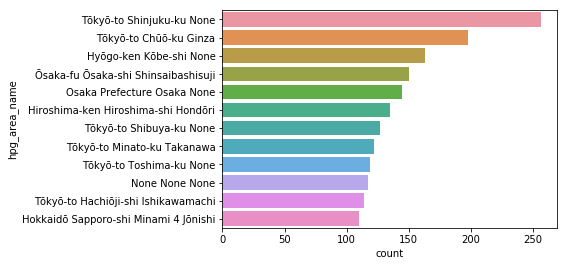

In [129]:
values = data_hpg_store_info['hpg_area_name'].value_counts()
values = values[values>100]
sns.countplot(y='hpg_area_name', data=data_hpg_store_info, order=values.index)

In [134]:
values

Tōkyō-to Shinjuku-ku None                257
Tōkyō-to Chūō-ku Ginza                   198
Hyōgo-ken Kōbe-shi None                  163
Ōsaka-fu Ōsaka-shi Shinsaibashisuji      150
Osaka Prefecture Osaka None              145
Hiroshima-ken Hiroshima-shi Hondōri      135
Tōkyō-to Shibuya-ku None                 127
Tōkyō-to Minato-ku Takanawa              122
Tōkyō-to Toshima-ku None                 119
None None None                           117
Tōkyō-to Hachiōji-shi Ishikawamachi      114
Hokkaidō Sapporo-shi Minami 4 Jōnishi    110
Name: hpg_area_name, dtype: int64

In [131]:
data_hpg_store_info['hpg_area_name'][]

0               Tōkyō-to Setagaya-ku Taishidō
1               Tōkyō-to Setagaya-ku Taishidō
2               Tōkyō-to Setagaya-ku Taishidō
3               Tōkyō-to Setagaya-ku Taishidō
4               Tōkyō-to Setagaya-ku Taishidō
5               Tōkyō-to Setagaya-ku Taishidō
6               Tōkyō-to Setagaya-ku Taishidō
7               Tōkyō-to Setagaya-ku Taishidō
8               Tōkyō-to Setagaya-ku Taishidō
9               Tōkyō-to Setagaya-ku Taishidō
10              Tōkyō-to Setagaya-ku Taishidō
11              Tōkyō-to Setagaya-ku Taishidō
12              Tōkyō-to Setagaya-ku Taishidō
13              Tōkyō-to Setagaya-ku Taishidō
14              Tōkyō-to Setagaya-ku Taishidō
15              Tōkyō-to Setagaya-ku Taishidō
16            Hyōgo-ken Himeji-shi Tsuchiyama
17            Hyōgo-ken Himeji-shi Tsuchiyama
18            Hyōgo-ken Himeji-shi Tsuchiyama
19            Hyōgo-ken Himeji-shi Tsuchiyama
20            Hyōgo-ken Himeji-shi Tsuchiyama
21            Hyōgo-ken Himeji-shi

Some restaurants are common to both services (AIR and HPG). Let's see if there are any discrepancies in the information about them on both services.

In [78]:
commons = []
for line in data_store_id_relation.iterrows():
    air_id = line[1]['air_store_id']
    hpg_id = line[1]['hpg_store_id']
    air_restaurant = data_air_store_info[data_air_store_info['air_store_id']==air_id]
    hpg_restaurant = data_hpg_store_info[data_hpg_store_info['hpg_store_id']==hpg_id]
    if len(air_restaurant) and len(hpg_restaurant):
        commons.append((hpg_id,air_id))

Although there are 150 restaurants listed in table 'store_id_relation', only 63 restaurants actually have a record on both services.

In [34]:
hpg_genres = data_hpg_store_info['hpg_genre_name'].unique()
air_genres = data_air_store_info['air_genre_name'].unique()

In [135]:
vals = data_air_store_info.groupby('air_genre_name')

In [137]:
help(vals)

Help on DataFrameGroupBy in module pandas.core.groupby object:

class DataFrameGroupBy(NDFrameGroupBy)
 |  Class for grouping and aggregating relational data. See aggregate,
 |  transform, and apply functions on this object.
 |  
 |  It's easiest to use obj.groupby(...) to use GroupBy, but you can also do:
 |  
 |  ::
 |  
 |      grouped = groupby(obj, ...)
 |  
 |  Parameters
 |  ----------
 |  obj : pandas object
 |  axis : int, default 0
 |  level : int, default None
 |      Level of MultiIndex
 |  groupings : list of Grouping objects
 |      Most users should ignore this
 |  exclusions : array-like, optional
 |      List of columns to exclude
 |  name : string
 |      Most users should ignore this
 |  
 |  Notes
 |  -----
 |  After grouping, see aggregate, apply, and transform functions. Here are
 |  some other brief notes about usage. When grouping by multiple groups, the
 |  result index will be a MultiIndex (hierarchical) by default.
 |  
 |  Iteration produces (key, group) tup

In [143]:
data_air_store_info.groupby('air_genre_name').size()

air_genre_name
Asian                             2
Bar/Cocktail                     79
Cafe/Sweets                     181
Creative cuisine                 13
Dining bar                      108
International cuisine             2
Italian/French                  102
Izakaya                         197
Japanese food                    63
Karaoke/Party                     2
Okonomiyaki/Monja/Teppanyaki     14
Other                            27
Western food                     16
Yakiniku/Korean food             23
dtype: int64

In [144]:
data_hpg_store_info.groupby('hpg_genre_name').size()

hpg_genre_name
Amusement bar                      5
Bar/Cocktail                       7
Bistro                            22
Cafe                              16
Cantonese food                     4
Chinese general                   91
Creation                         410
Creative Japanese food            60
Dim Sum/Dumplings                  2
French                            27
Grilled meat                     325
International cuisine            700
Italian                          249
Japanese cuisine/Kaiseki          64
Japanese food in general          85
Japanese style                  1750
Karaoke                           60
Korean cuisine                    38
Okonomiyaki/Monja/Teppanyaki      44
Party                             40
Pasta/Pizza                       10
Seafood                          339
Shabu-shabu/Sukiyaki              59
Shanghai food                      1
Sichuan food                       3
Spain Bar/Italian Bar            229
Spain/Mediterranean cui

Time is presented to the nearest hour.

In [3]:
### Extract relevant information about time
date_format = '%Y-%m-%d'
extract_date = lambda x:datetime.strptime(x[:10],date_format)
extract_hour = lambda x:int(x[11:13])
data_air_reserve['visit_date'] = data_air_reserve['visit_datetime'].apply(extract_date)
data_air_reserve['visit_hour'] = data_air_reserve['visit_datetime'].apply(extract_hour)
data_air_reserve['reserve_date'] = data_air_reserve['reserve_datetime'].apply(extract_date)
data_air_reserve['reserve_hour'] = data_air_reserve['reserve_datetime'].apply(extract_hour)
data_hpg_reserve['visit_date'] = data_hpg_reserve['visit_datetime'].apply(extract_date)
data_hpg_reserve['visit_hour'] = data_hpg_reserve['visit_datetime'].apply(extract_hour)
data_hpg_reserve['reserve_date'] = data_hpg_reserve['reserve_datetime'].apply(extract_date)
data_hpg_reserve['reserve_hour'] = data_hpg_reserve['reserve_datetime'].apply(extract_hour)

KeyboardInterrupt: 

In [7]:
print(data_air_reserve.info())
print(data_hpg_reserve.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
air_store_id        92378 non-null object
visit_datetime      92378 non-null object
reserve_datetime    92378 non-null object
reserve_visitors    92378 non-null int64
dtypes: int64(1), object(3)
memory usage: 2.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000320 entries, 0 to 2000319
Data columns (total 4 columns):
hpg_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors    int64
dtypes: int64(1), object(3)
memory usage: 61.0+ MB
None


In [9]:
print(data_air_reserve.describe())
#print(data_hpg_reserve.describe())

       reserve_visitors
count      92378.000000
mean           4.481749
std            4.919669
min            1.000000
25%            2.000000
50%            3.000000
75%            5.000000
max          100.000000


In [ ]:
fig,ax = py.subplots()
ax.hist(data_hpg_reserve['visit_hour'],bins=24)

In [38]:
data_air_reserve['visit_hour'].value_counts()

18    24355
19    22028
20    13371
17     9355
21     7509
22     3225
11     2979
12     2806
13     1606
16     1279
23     1063
14      780
15      494
0       430
1       330
10      316
2       189
3       118
4        55
9        25
8        19
5        19
7        15
6        12
Name: visit_hour, dtype: int64

In [191]:
print(max([len(x) for x in data_air_store_info['air_genre_name']]))
print(max([len(x) for x in data_hpg_store_info['hpg_genre_name']]))

28
28


In [192]:
print(max([len(x) for x in data_air_store_info['air_area_name']]))
print(max([len(x) for x in data_hpg_store_info['hpg_area_name']]))

45
61


In [197]:
data_air_visit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
air_store_id    252108 non-null object
visit_date      252108 non-null object
visitors        252108 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.8+ MB


In [198]:
sorted(data_air_visit_data['visitors'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 152,
 156,
 158,
 161,
 162,
 164,
 166,
 167,
 168,
 169,
 170,
 175,
 176,
 178,
 180,
 181,
 182,
 183,
 188,
 189,
 199,
 201,
 202,
 205,
 207,
 209,
 211,
 216,
 217,
 218,
 222,
 228,
 229,
 235,
 239,
 244

In [200]:
data_air_visit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
air_store_id    252108 non-null object
visit_date      252108 non-null object
visitors        252108 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.8+ MB


In [201]:
data_date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
calendar_date    517 non-null object
day_of_week      517 non-null object
holiday_flg      517 non-null int64
dtypes: int64(1), object(2)
memory usage: 12.2+ KB


In [206]:
data_date_info['holiday_flg'].value_counts()

0    482
1     35
Name: holiday_flg, dtype: int64

In [222]:
week_holidays = data_date_info[(data_date_info['holiday_flg']==1) & (data_date_info['day_of_week']!='Sunday') & (data_date_info['day_of_week']!='Saturday')]

In [223]:
week_holidays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 490
Data columns (total 3 columns):
calendar_date    26 non-null object
day_of_week      26 non-null object
holiday_flg      26 non-null int64
dtypes: int64(1), object(2)
memory usage: 832.0+ bytes


In [225]:
problem = 'hpg_dac72789163a3f47'
data_hpg_store_info[data_hpg_store_info['hpg_store_id']==problem]

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
4490,hpg_dac72789163a3f47,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698
